# Backtrader Introduction

References: https://www.youtube.com/watch?v=aTSD_SviPLY&list=PLozLnT2Cz6R_mJbfdJTvOSl-3ocafIKEZ

In [1]:
import yfinance as yf
import backtrader as bt
import matplotlib.pyplot as plt

In [2]:
tesla_daily = yf.download(tickers="TSLA", start="2021-12-01", interval="1d")
tesla_weekly = yf.download(tickers="TSLA", start="2021-12-01", interval="1wk")
tesla_daily

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,386.899994,390.946655,363.586670,365.000000,365.000000,68450400
2021-12-02,366.353333,371.000000,352.216675,361.533325,361.533325,73114800
2021-12-03,361.596680,363.526672,333.403320,338.323334,338.323334,92322000
2021-12-06,333.836670,340.546661,316.833344,336.336670,336.336670,81663000
2021-12-07,348.066681,352.556671,342.269989,350.583344,350.583344,56084700
...,...,...,...,...,...,...
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300
2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600


In [3]:
tesla_daily_parsed = bt.feeds.PandasData(
                    dataname=tesla_daily.copy(deep=True),
                    datetime=None,
                    open=0, high=1, low=2, # meaning "open" column at Column 1
                    close=4, volume=5,
                    openinterest=None, # = None, there is no open interest column
                    )
tesla_daily_parsed

In [4]:
tesla_weekly_parsed = bt.feeds.PandasData(
                    dataname=tesla_weekly,
                    datetime=None,
                    open=0, high=1, low=2, # meaning "open" column at Column 1
                    close=4, volume=5,
                    openinterest=None, # there is no open interest column
                    timeframe=bt.TimeFrame.Weeks) # resam
tesla_weekly_parsed

In [5]:
cerebro =  bt.Cerebro()
# cerebro.adddata(tesla_hourly_parsed)
cerebro.adddata(tesla_daily_parsed)
cerebro.adddata(tesla_weekly_parsed)

In [6]:
cerebro.run()
%matplotlib inline
cerebro.plot(iplot=False)

[[<Figure size 640x480 with 6 Axes>]]

In [7]:
# define strategy
class testStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close[0]

    def log(self, txt):
        dt = self.datas[0].datetime.datetime()
        print(f'{dt} | {txt}')
        
    def next(self):
        self.log(txt=self.dataclose)


In [8]:
cerebro = bt.Cerebro()
cerebro.adddata(tesla_daily_parsed)
cerebro.addstrategy(testStrategy)
cerebro.run()

2021-12-01 00:00:00 | 239.3690948486328
2021-12-02 00:00:00 | 239.3690948486328
2021-12-03 00:00:00 | 239.3690948486328
2021-12-06 00:00:00 | 239.3690948486328
2021-12-07 00:00:00 | 239.3690948486328
2021-12-08 00:00:00 | 239.3690948486328
2021-12-09 00:00:00 | 239.3690948486328
2021-12-10 00:00:00 | 239.3690948486328
2021-12-13 00:00:00 | 239.3690948486328
2021-12-14 00:00:00 | 239.3690948486328
2021-12-15 00:00:00 | 239.3690948486328
2021-12-16 00:00:00 | 239.3690948486328
2021-12-17 00:00:00 | 239.3690948486328
2021-12-20 00:00:00 | 239.3690948486328
2021-12-21 00:00:00 | 239.3690948486328
2021-12-22 00:00:00 | 239.3690948486328
2021-12-23 00:00:00 | 239.3690948486328
2021-12-27 00:00:00 | 239.3690948486328
2021-12-28 00:00:00 | 239.3690948486328
2021-12-29 00:00:00 | 239.3690948486328
2021-12-30 00:00:00 | 239.3690948486328
2021-12-31 00:00:00 | 239.3690948486328
2022-01-03 00:00:00 | 239.3690948486328
2022-01-04 00:00:00 | 239.3690948486328
2022-01-05 00:00:00 | 239.3690948486328


Momentum

if close[2] > close[1] --> buy if the close[2] < close[2] --> sell

In [9]:
class Momentum(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
    def next(self):
        if self.dataclose[-2] > self.dataclose[-1]:
            self.order = self.buy()
            print(f"buy executed @ {self.dataclose[0]}")
        elif self.dataclose[-2] < self.dataclose[-1]:
            self.order = self.sell()
            print(f'sell executed @ {self.dataclose[0]}')
        else:
            self.order = self.close()
            print(f'closing @ {self.dataclose[0]}')

In [10]:
cerebro = bt.Cerebro()
cerebro.adddata(tesla_daily_parsed)
cerebro.addstrategy(Momentum)

cerebro.run()

sell executed @ 365.0
sell executed @ 361.5333251953125
buy executed @ 338.3233337402344
buy executed @ 336.336669921875
buy executed @ 350.5833435058594
sell executed @ 356.32000732421875
sell executed @ 334.6000061035156
buy executed @ 339.010009765625
sell executed @ 322.13665771484375
buy executed @ 319.5033264160156
buy executed @ 325.3299865722656
sell executed @ 308.97332763671875
buy executed @ 310.8566589355469
sell executed @ 299.9800109863281
buy executed @ 312.84332275390625
sell executed @ 336.2900085449219
sell executed @ 355.6666564941406
sell executed @ 364.64666748046875
sell executed @ 362.8233337402344
buy executed @ 362.0633239746094
buy executed @ 356.7799987792969
buy executed @ 352.260009765625
buy executed @ 399.9266662597656
sell executed @ 383.1966552734375
buy executed @ 362.7066650390625
buy executed @ 354.8999938964844
buy executed @ 342.32000732421875
buy executed @ 352.7066650390625
sell executed @ 354.79998779296875
sell executed @ 368.739990234375
sell 

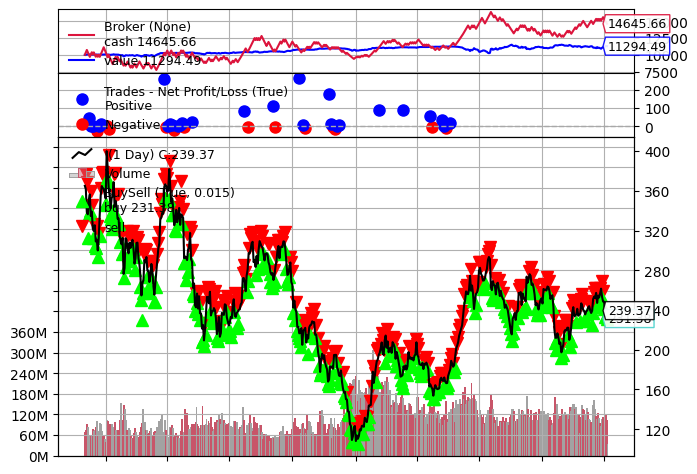

[[<Figure size 960x720 with 4 Axes>]]

In [11]:
%matplotlib inline
cerebro.plot(iplot=False)

SMA and RSI strategy

In [12]:
class TestStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.sma7 = bt.indicators.SMA(self.datas[0].close, period=7)
        self.sma14 = bt.indicators.SMA(self.datas[0].close, period=14)
        self.rsi = bt.indicators.RSI(self.datas[0].close, period=14)
    
    def next(self):
        if self.sma7 >= self.sma14 and self.rsi < 50:
            self.order = self.buy()
            self.log(txt=f'Buy executed @ {self.dataclose[0]}')
        elif self.sma7 <= self.sma14 and self.rsi >= 50:
            self.order = self.sell()
            self.log(txt=f'Sell executed @ {self.dataclose[0]}')
        else:
            self.order = self.close()
            self.log(txt=f'Close position @ {self.dataclose[0]}')
    
    def log(self, txt):
        print(f'{self.datas[0].datetime.datetime()} | {txt}')
        
cerebro = bt.Cerebro()
cerebro.adddata(tesla_daily_parsed)
cerebro.addstrategy(TestStrategy)
cerebro.run()

2021-12-21 00:00:00 | Close position @ 312.84332275390625
2021-12-22 00:00:00 | Close position @ 336.2900085449219
2021-12-23 00:00:00 | Close position @ 355.6666564941406
2021-12-27 00:00:00 | Sell executed @ 364.64666748046875
2021-12-28 00:00:00 | Close position @ 362.8233337402344
2021-12-29 00:00:00 | Close position @ 362.0633239746094
2021-12-30 00:00:00 | Buy executed @ 356.7799987792969
2021-12-31 00:00:00 | Buy executed @ 352.260009765625
2022-01-03 00:00:00 | Close position @ 399.9266662597656
2022-01-04 00:00:00 | Close position @ 383.1966552734375
2022-01-05 00:00:00 | Buy executed @ 362.7066650390625
2022-01-06 00:00:00 | Buy executed @ 354.8999938964844
2022-01-07 00:00:00 | Buy executed @ 342.32000732421875
2022-01-10 00:00:00 | Buy executed @ 352.7066650390625
2022-01-11 00:00:00 | Buy executed @ 354.79998779296875
2022-01-12 00:00:00 | Sell executed @ 368.739990234375
2022-01-13 00:00:00 | Close position @ 343.85333251953125
2022-01-14 00:00:00 | Close position @ 349.8

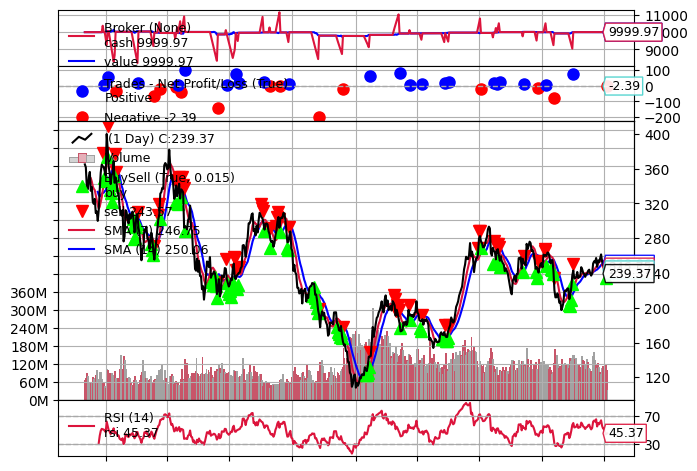

[[<Figure size 640x480 with 5 Axes>]]

In [13]:
%matplotlib inline
cerebro.plot(iplot=False)